# Lab 8 - San Francisco Crime 

## Csomagok
- numpy: tudományos számításokra használt könyvtár
- pandas: gyors, könnyen használható adatszerkezeteket és data adatelemező eszközöket biztosít
- matplotlib: függvény- és adatokatábrázolás
- Folim: térképkészítés

In [2]:
# jupyter utasítás a matplotlibes grafikon megjelenítési módjának megadására
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 

## Adatbetöltés

A strukturált adatainkat a pandas csomag `DataFrame` nevű adatszerkezetével tudjuk reprezentálni. Esetünkben egy CSV fájlt akarunk beolvasni: 

In [8]:
df = pd.read_csv('./Data/Map-Crime_Incidents-Previous_Three_Months.csv')

In [9]:
df.head(10) # első n sor kiírása

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
5,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,00:01,CENTRAL,NONE,GRANT AV / SUTTER ST,-122.405403,37.789630,"(37.7896302267231, -122.405402610955)"
6,NaN,WARRANTS,WARRANT ARREST,Sunday,08/31/2014 07:00:00 AM +0000,18:51,RICHMOND,"ARREST, BOOKED",MARTIN LUTHER KING JR DR / 25TH AV,-122.482372,37.766770,"(37.7667702165662, -122.482372245817)"
7,NaN,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014 07:00:00 AM +0000,10:30,INGLESIDE,NONE,200.0 Block of ATHENS ST,-122.427017,37.723453,"(37.7234534751554, -122.427016818213)"
8,NaN,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,08/31/2014 07:00:00 AM +0000,16:30,CENTRAL,NONE,100.0 Block of JACKSON ST,-122.398859,37.796984,"(37.7969838270893, -122.398859251506)"
9,NaN,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Sunday,08/31/2014 07:00:00 AM +0000,18:18,CENTRAL,NONE,300.0 Block of POWELL ST,-122.408334,37.787683,"(37.7876829825053, -122.40833353294)"


Globálisan is megadhatjuk a megjelenítés mennyiségét:

In [10]:
pd.set_option('display.max_rows', 10) #Visualize 10 rows 
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,NaN,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)"
30756,NaN,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)"
30757,NaN,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)"
30758,NaN,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)"


In [11]:
df.columns # beolvasott oszlopok nevei

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

In [12]:
len(df) # sorok száma

30760

## Adat előkészítése

Első lépésként nyerjük ki a dátumból a hónapot és napot. A DataFrame-hez egyszerűen értékeadással lehetőségünk van új oszlopokat felvenni. A `Month` oszlopot az `apply()` metódusnak megadott névtelen függvénnyel fogjuk meghatározni.

In [15]:
df['Month'] = df.Date.apply(lambda row: int(row[0:2])) # elérni adattagon keresztül is lehet, definiálni csak []-el
df['Day'] = df['Date'].apply(lambda row: int(row[3:5]))

print(df['Month'][0:2])
print(df['Day'][0:2])

0    8
1    8
Name: Month, dtype: int64
0    31
1    31
Name: Day, dtype: int64


Eltávolítani a Python `del` utasításával tudunk.

In [20]:
del df['IncidntNum']

A drop metódussal a dataframe több részét is el tudjuk dobni. `inplace` adja meg, hogy módosuljon, vagy új dataframe jöjjön létre.

In [25]:
df.drop(columns=['Location'], inplace=True) # Ha csak egyet akarunk törölni, elég csak stringet átadni
# df.drop(rows=[1,2,3]) # lehet sort is

In [26]:
df.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Day', 'Month'],
      dtype='object')

## Adatelemzés

A `value_counts()` egy sorozatot állít elő, mely a megadott oszlop szerint csoportosítva megadja a csoport számosságát.

In [29]:
CountCategory = df['Category'].value_counts()
CountCategory

Category
LARCENY/THEFT                 8205
OTHER OFFENSES                4004
NON-CRIMINAL                  3653
ASSAULT                       2518
VEHICLE THEFT                 1885
                              ... 
SEX OFFENSES, NON FORCIBLE       5
BAD CHECKS                       3
GAMBLING                         1
PORNOGRAPHY/OBSCENE MAT          1
BRIBERY                          1
Name: count, Length: 36, dtype: int64

In [37]:
df['Category'].value_counts(ascending=True) # rendezés állítható

Category
PORNOGRAPHY/OBSCENE MAT          1
GAMBLING                         1
BRIBERY                          1
BAD CHECKS                       3
SEX OFFENSES, NON FORCIBLE       5
                              ... 
VEHICLE THEFT                 1885
ASSAULT                       2518
NON-CRIMINAL                  3653
OTHER OFFENSES                4004
LARCENY/THEFT                 8205
Name: count, Length: 36, dtype: int64

Melyik bűncselekményt követték el a leggyakrabban?

In [36]:
df['Category'].value_counts().idxmax() # a neve ellenére kulcsot ad vissza

'LARCENY/THEFT'

Mely körzetben (`PdDistrict`) történt a legtöbb bűncselekmény?

In [35]:
df['PdDistrict'].value_counts().idxmax()

'SOUTHERN'

#### Dataframe felosztása

A dataframe indexeléssel akár fel is osztható. Ehhez az index kulcsnak valami logikai kifejezést adunk meg:

In [39]:
AugustCrimes = df[df['Month'] == 8]
AugustCrimes

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Day,Month
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,31,8
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,31,8
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,31,8
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,31,8
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,31,8
...,...,...,...,...,...,...,...,...,...,...,...,...
9715,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,08/01/2014 07:00:00 AM +0000,19:55,MISSION,NONE,1100.0 Block of POTRERO AV,-122.406497,37.754279,1,8
9716,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,08/01/2014 07:00:00 AM +0000,22:47,RICHMOND,NONE,1500.0 Block of BRODERICK ST,-122.441458,37.784427,1,8
9717,ASSAULT,THREATS AGAINST LIFE,Friday,08/01/2014 07:00:00 AM +0000,23:55,BAYVIEW,NONE,400.0 Block of TUNNEL AV,-122.401364,37.709748,1,8
9718,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Friday,08/01/2014 07:00:00 AM +0000,23:38,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,8


Hány bűncselekmény történt augusztusban?

In [40]:
len(AugustCrimes)

9720

Hány lopás (`BURGLARY`) történt augusztusban?

In [41]:
len(df[df['Category'] == 'BURGLARY'])

1257

Több feltétel:

In [49]:
len(df[(df['Month'] == 7) & (df['Day'] == 4)]) # &, |, ~ = és, vagy, negáció

341

In [50]:
len(df.query('Month == 7 and Day == 4')) # gusztustalan ez a library

341

## Megjelenítés

Az adathalmaz tartalmazza, hol történtek a bűncselekmények.

### matplotlib

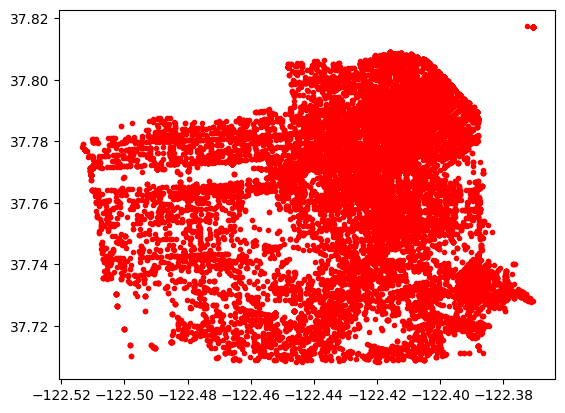

In [52]:
plt.plot(df['X'], df['Y'], 'r.') # grafikon rajzolás (utolsó paraméter kirajzolási opciók)
plt.show() # grafikon megjelenítés

Készítsünk szótárat a rendőrség körzeteiből (`PdDistrict`)!

In [53]:
pd_districts = np.unique(df['PdDistrict'])
pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

Adjuk hozzá a dataframe-hez az így legenerált azonosítókat.

In [56]:
df['PdDistrictCode'] = df['PdDistrict'].apply(lambda row: pd_districts_levels[row])
df.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Day', 'Month', 'PdDistrictCode'],
      dtype='object')

A bűncselekményeket színezzük körzet szerint.

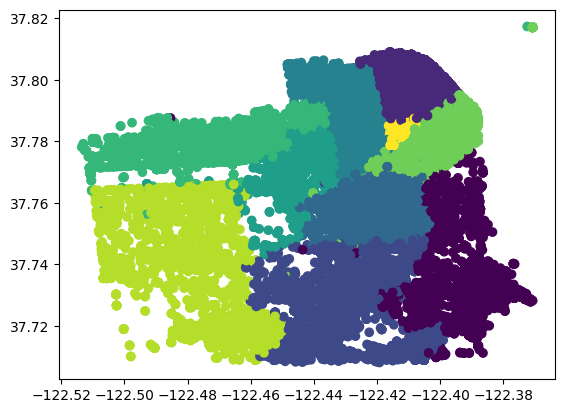

In [57]:
plt.scatter(df['X'], df['Y'], c=df['PdDistrictCode']) # scatter-plot készítése
plt.show()

### folium 

A folium csak hexadecimális színkódokkal működik ezért generáljunk minden körzetnek egy ilyen színt!

In [61]:
from matplotlib import colors

districts = np.unique(df['PdDistrict'])

dcolors = list(colors.cnames.values())[0:-1:len(districts)]

dcolors

['#F0F8FF',
 '#8A2BE2',
 '#00FFFF',
 '#FF8C00',
 '#FF1493',
 '#F8F8FF',
 '#4B0082',
 '#FAFAD2',
 '#B0C4DE',
 '#9370DB',
 '#FFDEAD',
 '#AFEEEE',
 '#FF0000',
 '#87CEEB',
 '#FF6347']

In [62]:
color_dict = dict(zip(districts, dcolors)) 
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

A térképet az adathalmaz koordinátáinak közepére rakjuk. Csak minden ötvenedik eseményt rajozljuk ki, hogy gyorsabb legyen.

In [63]:
map_osm = folium.Map(location=[df['Y'].mean(), df['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip( df['Y'], df['X'], df['PdDistrict'])) 

for el in obs[0:-1:plotEvery]: 
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2],radius=10).add_to(map_osm)
    

In [64]:
map_osm